<a href="https://colab.research.google.com/github/rodrigoreisbr-tech/data_science/blob/master/Analisando_os_Dados_do_IFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do iFood - *CASE* 

<center><img alt="Logo iFood" width="10%" src="https://github.com/rodrigoreisbr-tech/data_science/blob/master/img/IFood_logo.png?raw=true"></center>

A história do [iFood](https://institucional.ifood.com.br/) começou fora do mundo digital, em 2011, com a Disk Cook. Um guia (impresso!) de cardápios, com uma central telefônica para onde você ligava e fazia o seu pedido. A ideia do [iFood](https://institucional.ifood.com.br/) surgiu aí, para melhorar essa experiência.

Não demorou muito pra eles sairem do papel e ganhar o Brasil. Já no ano seguinte, foi lançado o aplicativo e o site. E a paixão por alimentação e tecnologia logo chamou a atenção de investidores importantes, como o Grupo Movile - que até hoje são parceiros.

Hoje, o [iFood](https://institucional.ifood.com.br/) é a  **FoodTech** de referência na América Latina.

<br>
<br>

-------------------------------
**Neste *notebook*, iremos analisar os dados referentes ao case do iFood, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler


%matplotlib inline

In [ ]:
# importar o arquivo ml_project1_data.csv para um DataFrame
# CSV disponibilizado pelo site Github do IFood (Copia no meu Github) 
#df = pd.read_csv("https://raw.githubusercontent.com/rodrigoreisbr-tech/data_science/master/dataset/ml_project1_data.csv")
# importação de dados (CSV realocado para Github)
df = pd.read_csv("https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv")


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise dos Dados

Segue abaixo a analise dos dados do dataset entregue pelo iFood

**Dicionário das variáveis**

* `AcceptedCmp1` - 1 if costumer accepted the offer in the 1 campaign, 0 otherwise
* `AcceptedCmp2` - 1 if costumer accepted the offer in the 2 campaign, 0 otherwise
* `AcceptedCmp3` - 1 if costumer accepted the offer in the 3 campaign, 0 otherwise
* `AcceptedCmp4` - 1 if costumer accepted the offer in the 4 campaign, 0 otherwise
* `AcceptedCmp5` - 1 if costumer accepted the offer in the 5 campaign, 0 otherwise
* `Response(target)` - 1 if costumer accepted the offer in the last campaign, 0 otherwise
* `Complain` - 1 if costumer complained in the last 2 years
* `DtCustomer` - date of custoner's enrollment with the company
* `Education` - customer's level of educarion
* `Marital` - customer's marital status
* `Kidhome` - number of small children in customer's household
* `Income` - customer's yearly household income
* `MntFishProducts` - amount spent on fish produts in the 2 years
* `MntMeatProducts` - amount spent on meat produts in the 2 years
* `MntFruits` - amount spent on fruits in the 2 years
* `MntSweetProducts` - amount spent on sweet produts in the 2 years
* `MntWines` - amount spent on wines in the 2 years
* `MntgoldProds` - amount spent on *gold* products in the 2 years
* `NumDealsPurchases` - number of purchases made with discount
* `NumCatalogPurchases` - number of purchases made using catalogue
* `NumStorePurchases` - number of purchases made directly in stores
* `NumWebPurchases` - number of purchases made through company's web site
* `NumWebVisitsMonth` - number of visits to company's web site in the last month
* `Recency` - number of days since the last purchase


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Adicionando informações uteis para analise.**

Nesta seção iremos adiconar algumas colunas para conseguir melhor nossa analise de dados, todos as colunas que iremos adiconar sao calculos prevenientes dos dados do dataset.

<br>

**Dicionário das variáveis**
* `CurrentYear` - current year
* `YearCustomer` - year the customer started
* `Age` - customer age
* `MonthsCustomer` - number of months they are our customer
* `IncomeMonth` - average monthly income



In [ ]:
def define_age_group(row):
    if row["Age"] < 25:
        return "1"
    elif row["Age"] >= 25 and row["Age"] <= 35:
        return "2"
    elif row["Age"] > 35 and row["Age"] <= 45:
        return "3"
    elif row["Age"] > 45 and row["Age"] <= 55:
        return "4"
    elif row["Age"] > 55 and row["Age"] <= 65:
        return "5"
    elif row["Age"] > 65:
        return "6"
    else:
        return "6"
    
def define_age_group_description(row):
    if row["Age"] < 25:
        return "1. Less than 25"
    elif row["Age"] >= 25 and row["Age"] <= 35:
        return "2. Between 25 and 35"
    elif row["Age"] > 35 and row["Age"] <= 45:
        return "3. Between 36 and 45"
    elif row["Age"] > 45 and row["Age"] <= 55:
        return "4. Between 46 and 55"
    elif row["Age"] > 55 and row["Age"] <= 65:
        return "5. Between 56 and 65"
    elif row["Age"] > 65:
        return "6. More than 65"
    else:
        return "5. No Information"

def define_years_customer_group(row):
    if row["YearCustomer"] < 1:
        return "1"
    elif row["YearCustomer"] >= 2 and row["YearCustomer"] <= 3:
        return "2"
    elif row["YearCustomer"] > 3 and row["YearCustomer"] <= 5:
        return "3"
    elif row["YearCustomer"] > 5 and row["YearCustomer"] <= 7:
        return "4"
    elif row["YearCustomer"] > 7 and row["YearCustomer"] <= 9:
        return "5"
    elif row["Age"] > 9:
        return "6"
    else:
        return "7"
    
def define_years_customer_group_description(row):
    if row["Age"] < 1:
        return "1. Less than 1 year"
    elif row["YearCustomer"] >= 2 and row["YearCustomer"] <= 3:
        return "2. Between 2 and 3 years"
    elif row["YearCustomer"] > 3 and row["YearCustomer"] <= 5:
        return "3. Between 3 and 5 years"
    elif row["YearCustomer"] > 5 and row["YearCustomer"] <= 7:
        return "4. Between 5 and 7 years"
    elif row["YearCustomer"] > 7 and row["YearCustomer"] <= 9:
        return "5. Between 7 and 9 years"
    elif row["Age"] > 9:
        return "6. More than 9 years"
    else:
        return "7. No Information"

def define_id_marital_status(row):
    if row["Marital_Status"] == "Single":
        return 1
    elif row["Marital_Status"] == "Married":
        return 2
    elif row["Marital_Status"] == "Together":
        return 3
    elif row["Marital_Status"] == "Divorced":
        return 4
    elif row["Marital_Status"] == "Absurd":
        return 5
    elif row["Marital_Status"] == "Widow":
        return 6
    elif row["Marital_Status"] == "Alone":
        return 7
    elif row["Marital_Status"] == "YOLO":
        return 8
    else:
        return -1
    
def define_id_education_status(row):
    if row["Education"] == "PhD":
        return 1
    elif row["Education"] == "Master":
        return 2
    elif row["Education"] == "Graduation":
        return 3
    elif row["Education"] == "Basic":
        return 4
    elif row["Education"] == "2n Cycle":
        return 5
    else:
        return -1

In [ ]:
#Adiciona uma coluna com o Ano atual e quanto o cliente se cadastrou
df["CurrentYear"] = datetime.today().strftime("%Y")
df["YearCustomer"] = pd.to_datetime(df["Dt_Customer"]).dt.year
df["CurrentYear"] = df["CurrentYear"].astype(float)
df["YearCustomer"] = df["YearCustomer"].astype(float)
df["YearsCustomer"] = df["CurrentYear"] - df["YearCustomer"]

#Adiciona uma coluna com a idade do Cliente
df["Age"] = df["CurrentYear"] - df["Year_Birth"]

#Adiciona uma coluna com quantos meses esta como cliente e o gasto por mês
df["MonthsCustomer"] = df["YearsCustomer"] * 12
df["IncomeMonth"] = df["Income"] / df["MonthsCustomer"]

# Adiciona uma coluna com a idade do Cliente
df["AgeGroup"] = df.apply(define_age_group, axis=1)
df["AgeGroupDescription"] = df.apply(define_age_group_description, axis=1)

#define the qty of years as customer
df["YearCustomerGroup"] = df.apply(define_years_customer_group, axis=1)
df["YearCustomerGroupDesc"] = df.apply(define_years_customer_group_description, axis=1)


#define the months as customer and the income by month
df["MaritalStatusId"] = df.apply(define_id_marital_status, axis=1)
df["EducationId"] = df.apply(define_id_education_status, axis=1)


### **1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# display(df.dtypes)
df.info()

Entradas:	 2240
Variáveis:	 41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_Birth             2240 non-null   int64  
 2   Education              2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2216 non-null   float64
 5   Kidhome                2240 non-null   int64  
 6   Teenhome               2240 non-null   int64  
 7   Dt_Customer            2240 non-null   object 
 8   Recency                2240 non-null   int64  
 9   MntWines               2240 non-null   int64  
 10  MntFruits              2240 non-null   int64  
 11  MntMeatProducts        2240 non-null   int64  
 12  MntFishProducts        2240 non-null   int64  
 13  MntSweetProducts       2240 non-null   int64  
 14  MntGoldProds           22

### **2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending= False)

Income                   0.010714
IncomeMonth              0.010714
ID                       0.000000
YearCustomer             0.000000
AcceptedCmp1             0.000000
AcceptedCmp2             0.000000
Complain                 0.000000
Z_CostContact            0.000000
Z_Revenue                0.000000
Response                 0.000000
CurrentYear              0.000000
Age                      0.000000
YearsCustomer            0.000000
AcceptedCmp4             0.000000
MonthsCustomer           0.000000
AgeGroup                 0.000000
AgeGroupDescription      0.000000
YearCustomerGroup        0.000000
YearCustomerGroupDesc    0.000000
MaritalStatusId          0.000000
AcceptedCmp5             0.000000
AcceptedCmp3             0.000000
Year_Birth               0.000000
MntFruits                0.000000
Education                0.000000
Marital_Status           0.000000
Kidhome                  0.000000
Teenhome                 0.000000
Dt_Customer              0.000000
Recency       

In [ ]:
df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CurrentYear,YearCustomer,YearsCustomer,Age,MonthsCustomer,IncomeMonth,AgeGroup,AgeGroupDescription,YearCustomerGroup,YearCustomerGroupDesc,MaritalStatusId,EducationId
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,2022.0,2013.0,9.0,39.0,108.0,NaN,3,3. Between 36 and 45,6,6. More than 9 years,2,3
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,2022.0,2013.0,9.0,36.0,108.0,NaN,3,3. Between 36 and 45,6,6. More than 9 years,1,3
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,2022.0,2013.0,9.0,63.0,108.0,NaN,5,5. Between 56 and 65,6,6. More than 9 years,1,1
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,2022.0,2014.0,8.0,71.0,96.0,NaN,6,6. More than 65,6,6. More than 9 years,1,3
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,2022.0,2013.0,9.0,40.0,108.0,NaN,3,3. Between 36 and 45,6,6. More than 9 years,1,3
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,2022.0,2012.0,10.0,49.0,120.0,NaN,4,4. Between 46 and 55,6,6. More than 9 years,2,5
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,2022.0,2012.0,10.0,65.0,120.0,NaN,5,5. Between 56 and 65,6,6. More than 9 years,2,1
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,2022.0,2014.0,8.0,65.0,96.0,NaN,5,5. Between 56 and 65,6,6. More than 9 years,1,3
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,2022.0,2013.0,9.0,49.0,108.0,NaN,4,4. Between 46 and 55,6,6. More than 9 years,3,2
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,2022.0,2013.0,9.0,61.0,108.0,NaN,5,5. Between 56 and 65,6,6. More than 9 years,2,1


### **3. Qual o tipo de distribuição das variáveis?**

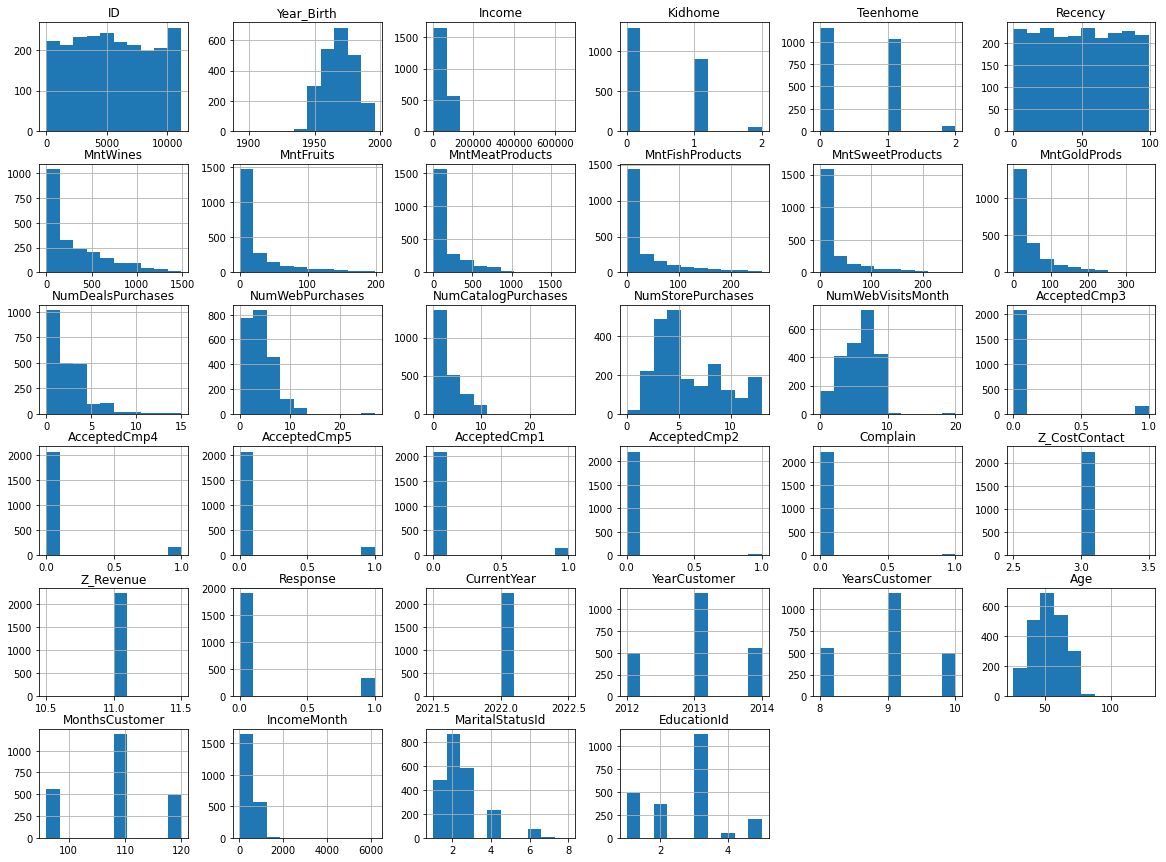

In [ ]:
# plotar o histograma das variáveis numéricas (distribuição dos dados)
df.hist(bins=10, figsize=(20,15));


### **4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar que não há presença de *outliers*.

### **5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df[['Dt_Customer', 'MntWines', 'MntSweetProducts', 'MntMeatProducts',
    'Income', 'Year_Birth']].corr()

display(corr)

,MntWines,MntSweetProducts,MntMeatProducts,Income,Year_Birth
MntWines,1.000000,0.386581,0.562667,0.578650,-0.157773
MntSweetProducts,0.386581,1.000000,0.523846,0.440744,-0.018133
MntMeatProducts,0.562667,0.523846,1.000000,0.584633,-0.030872
Income,0.578650,0.440744,0.584633,1.000000,-0.161791
Year_Birth,-0.157773,-0.018133,-0.030872,-0.161791,1.000000


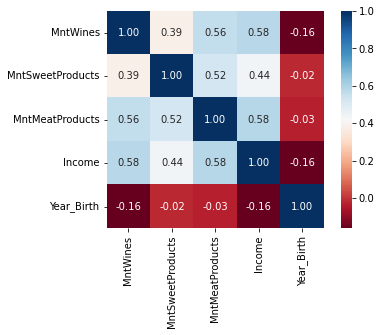

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **6. Qual a média da Renda?**

A media dos gastos "*Income*" dos clientes

In [ ]:
# ver a média da coluna `Income``
df['Income'].mean()

52247.25135379061

In [ ]:
# como esta distribuido
df['Income'].describe(include='all')

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

### **7. Qual é a relação entre o estado civil e gastos?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [ ]:
df_MStatus = df.groupby(["Marital_Status"])["Income", "MntWines", "MntMeatProducts", "MntSweetProducts", "MntGoldProds",  "MntFruits"].mean()

display(df_MStatus)

,Income,MntWines,MntMeatProducts,MntSweetProducts,MntGoldProds,MntFruits
Marital_Status,,,,,,
Absurd,72365.500000,355.500000,312.500000,30.500000,204.000000,84.500000
Alone,43789.000000,184.666667,26.333333,7.000000,27.000000,4.000000
Divorced,52834.228448,324.844828,150.206897,26.818966,46.288793,27.426724
Married,51724.978996,299.480324,160.681713,26.701389,42.822917,25.734954
Single,50995.350318,288.331250,182.108333,27.262500,43.729167,26.835417
Together,53245.534031,306.825862,168.103448,26.122414,42.994828,25.350000
Widow,56481.552632,369.272727,189.285714,39.012987,56.766234,33.090909
YOLO,48432.000000,322.000000,50.000000,3.000000,42.000000,3.000000


In [ ]:
df.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [ ]:
df.Complain.value_counts() / df.shape[0]

0    0.990625
1    0.009375
Name: Complain, dtype: float64

### **8. Qual renda media por estato civil e educação?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os estato civil com a Educação a partir da renda.



In [ ]:
# ver renda media por estado civil e educação
df.groupby(['Marital_Status','Education']).Income.mean().sort_values(ascending=False)[:10]

Marital_Status  Education 
Absurd          Graduation    79244.000000
                Master        65487.000000
Alone           Master        61331.000000
Widow           PhD           60288.083333
                Master        58401.545455
Married         PhD           58138.031579
Together        PhD           56041.422414
                Graduation    55758.480702
Widow           Graduation    54976.657143
Divorced        Graduation    54526.042017
Name: Income, dtype: float64

Acima, vemos que o estato civil Absurd e educação Graduation e Master, estão com média de renda superior a de Alone com Master e Married com PhD.



## Machine Learning

Segue abaixo a analise dos dados do dataset entregue pelo iFood

> "Você não controla aquilo que não consegue mensurar"

A variável alvo está representada na coluna AcceptedCmp1, onde:

0: Não comprou com a primeira campanha;

1: Comprou com a primeira campanha;

Verificando abaixo o resumo estatístico, por meio do método `describe()`, podemos confirmar que as variáveis relativas aos componentes principais não têm nenhuma discrepância aparente, bem como a coluna `MonthsCustumer`.




### **1. Resumo estatístico**

Estaremos separando o dataset em 3 Dimensões Original, Teste, Treino.



In [ ]:
# ver o resumo estatístico
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CurrentYear,YearCustomer,YearsCustomer,Age,MonthsCustomer,IncomeMonth,MaritalStatusId,EducationId
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2022.0,2013.028125,8.971875,53.194196,107.662500,488.556431,2.404018,2.606250
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.0,0.684554,0.684554,11.984069,8.214652,239.231656,1.161263,1.124797
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2022.0,2012.000000,8.000000,26.000000,96.000000,18.020833,1.000000,1.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2022.0,2013.000000,9.000000,45.000000,108.000000,330.548611,2.000000,2.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2022.0,2013.000000,9.000000,52.000000,108.000000,475.525463,2.000000,3.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2022.0,2013.000000,9.000000,63.000000,108.000000,639.782407,3.000000,3.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2022.0,2014.000000,10.000000,129.000000,120.000000,6172.833333,8.000000,5.000000


In [ ]:
# ver se há valores ausentes
df.isnull().sum().max()

24

### **2. Separando o Dataset**

Estaremos separando o dataset em 3 Dimensões Original, Teste, Treino.



In [ ]:
# dimensões do conjunto original
print("Dimensões do Conjunto Original: ", df.shape)

# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto Original:  (2240, 41)
Dimensões do Conjunto de Teste:  (336, 41)
Dimensões do Conjunto de Treino:  (1904, 41)


### **3. Analise exploratoria**

Estamos realizando esta analise para verificar qual data iremos tentar prever.

Como é foi visto, as entradas relativas à transações que são efetuadas nas primeiras campanhas correspondem a 1, 6,4343% do total.



0    1781
1     123
Name: AcceptedCmp1, dtype: int64

Compras realizadas na primeria campanha 6.4601% do dataset.



[]

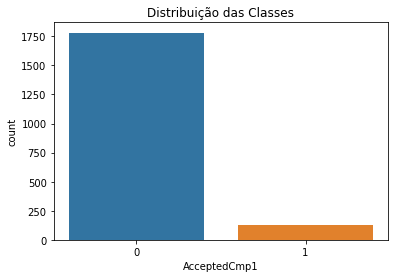

In [ ]:
# ver o balanceamento das classes
print(df.AcceptedCmp1.value_counts())
print("\nCompras realizadas na primeria campanha {:.4f}% do dataset.\n".format((df[df.AcceptedCmp1 == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('AcceptedCmp1', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

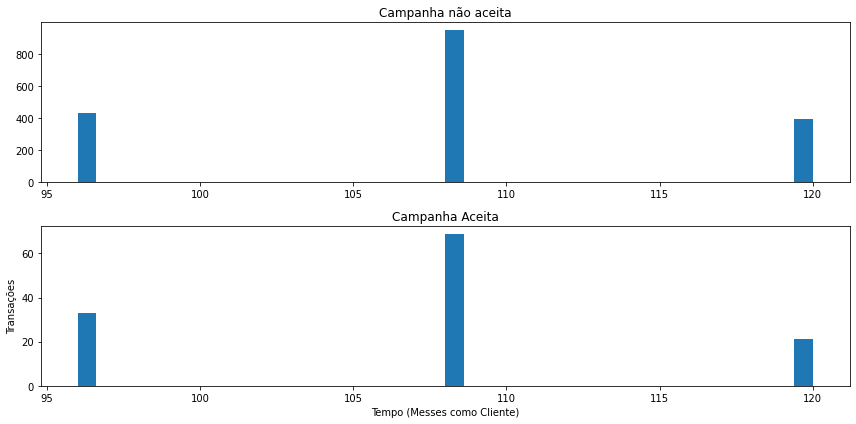

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.MonthsCustomer[df.AcceptedCmp1 == 0], bins=num_bins)
ax[0].set_title('Campanha não aceita')

ax[1].hist(df.MonthsCustomer[df.AcceptedCmp1 == 1], bins=num_bins)
ax[1].set_title('Campanha Aceita')

plt.xlabel('Tempo (Messes como Cliente)')
plt.ylabel('Transações')
plt.tight_layout()

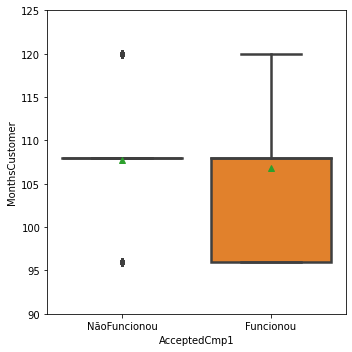

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), sharex=True)

sns.boxplot(df.AcceptedCmp1,df.MonthsCustomer, linewidth=2.5, showmeans=True, ax=ax)

plt.ylim((90, 125))
plt.xticks([0, 1], ['NãoFuncionou', 'Funcionou'])

plt.tight_layout()

:As informações estatísticas para `df.AcceptedCmp1 == 1` mostram que a sua média exata está em 106.50 e a mediana em 108.

In [ ]:
df[(df.AcceptedCmp1 == 1) & (df.MonthsCustomer < 200)]['MonthsCustomer'].describe()

count    123.000000
mean     106.829268
std        7.896573
min       96.000000
25%       96.000000
50%      108.000000
75%      108.000000
max      120.000000
Name: MonthsCustomer, dtype: float64

### **4. Preparando os dados**

Para que os dados possam alimentar o modelo de Regressão Logística que iremos construir, nesta etapa de preparação iremos:

* Dividir entre dados de treino e teste
* Balancear os dados a fim de evitar uma baixa performance para a classe 1 e *overfitting*.

**Dividir entre conjuntos de Treino e Validação**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre Treino e Validação. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de Treino e Validação tenham a mesma quantidade de classes proporcionalmente, passamos `stratify=True`.

In [ ]:

df_clean = df.copy()

# ver as primeiras entradas
df_clean.head()

df_clean = df.drop(['AcceptedCmp1','Education','Marital_Status','AgeGroupDescription','YearCustomerGroupDesc'], axis=1)
df = df.drop(['Education','Marital_Status','AgeGroupDescription','YearCustomerGroupDesc'], axis=1)
df_clean['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).dt.strftime("%Y%m%d")
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).dt.strftime("%Y%m%d")

df_clean = df.fillna(0)


# separar variáveis entre X e y
X = df_clean.drop('AcceptedCmp1', axis=1)
y = df['AcceptedCmp1']

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

**Balanceamento dos dados**

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar *Under-sampling*, preservando a classe minoritária.

É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste *notebook*).

0    92
1    92
Name: AcceptedCmp1, dtype: int64


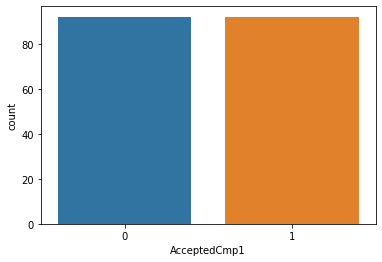

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras.

Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

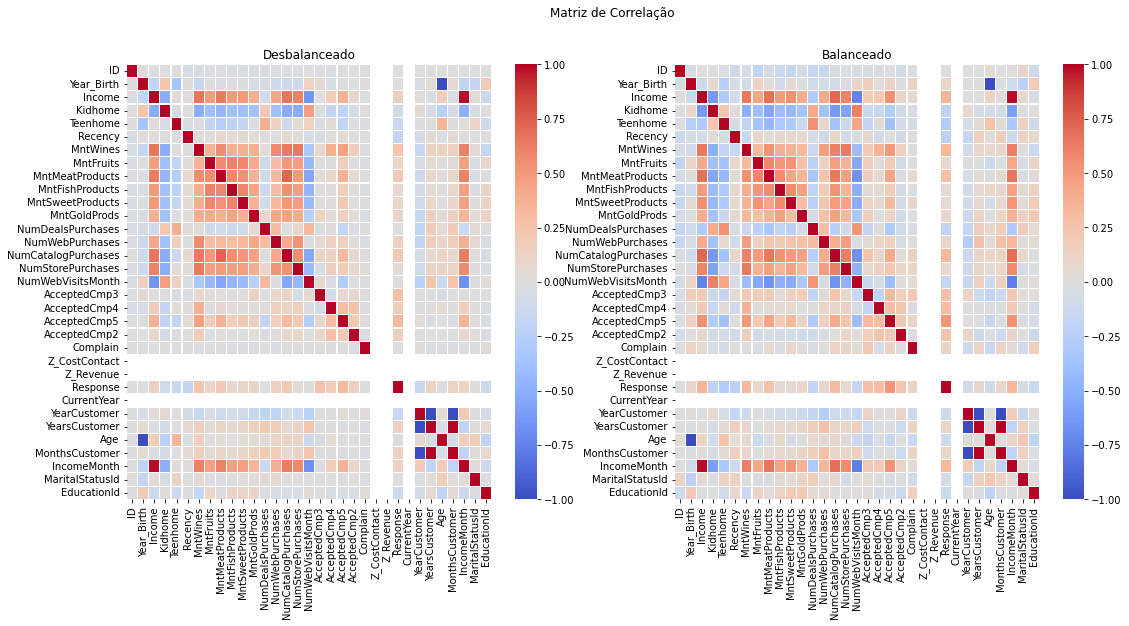

In [ ]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

### **5. Modelo de Machine Learning**


Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.
**negrito**

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna *recall* do Relatório de Classificação. 

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), ou área sob a curva. No caso desse modelo de Regressão Logística, tem-se 96% de AUC.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9909    0.7371    0.8454       445
           1     0.1931    0.9032    0.3182        31

    accuracy                         0.7479       476
   macro avg     0.5920    0.8202    0.5818       476
weighted avg     0.9390    0.7479    0.8110       476

Acurácia: 0.7479

AUC: 0.8202



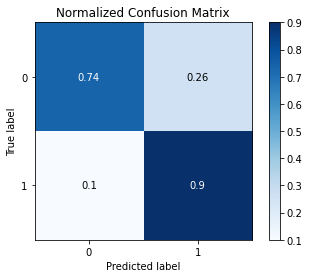

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

## Conclusões


Como você pode observar, não se trata de um problema trivial. Apesar dos dados estarem bem tratados e limpos, com poucos valores ausentes ou variáveis categóricas, o desbalanceamento e a Transformação PCA demandaram um trabalho considerável.

Obviamente, não tivemos um resultado bom, mais ainda vejo muito espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.